PR-new-logo-orizontal (1).svg

# **Lab07PR. Procesarea limbajului natural**


**Overview**

+ Ce reprezintă prelucrarea limbajului natural (NLP - Natural Language Processing)?
+ Ce task-uri pot fi rezolvate folosind NLP?

+ Partea 1. Metode statistice și reprezentarea textului folosind rețele neurale simple

  + Teorie:
      + Cum se reprezintă cuvintele?
        + Reprezentarea cuvintelor folosind one-hot encoding
        + Reprezentarea cuvintelor folosind proprietăți (word feature representation)
        + Reprezentarea cuvintelor folosind word embeddings
      + Cum se reprezintă blocurile de text?
        + Bag of words
        + Bag of n-grams
    + Bibiotecile de NLP: NLTK, gensim, etc
    
  + Practic:
      + Preprocesarea textului
        + Sanitizarea textului (text cleaning)
        + Tokenizarea textului (Tokenization)
        + Stemming
        + Lemmatizarea (Lematization)
        + Eliminarea stopword-urilor (Stopwords removal)
      + Folosirea reprezentării Bag of Words

+ Partea 2. Reprezentarea textului folosind arhitecturi de tip Transformer

  + Teorie:
      + Arhitectura de tip Transformer
      + Modele encoder only
      + Modele decoder only
  + Practic:
      + Folosirea modelelor mari de limbaj si a bibliotectii HuggingFace
      + Chain of Thought
      + LLMs ca substitut pentru algoritmi de clasificare

## Natural Language Processing (NLP)

Procesarea limbajului natural (NLP), care a evoluat din lingvistica computațională, utilizează metode din diverse discipline, cum ar fi `computer science, inteligența artificială, lingvistica și data science`, pentru a permite computerelor să înțeleagă limbajul uman atât în formă scrisă, cât și verbală. În timp ce lingvistica computațională se concentrează mai mult pe aspectele limbajului, procesarea limbajului natural subliniază utilizarea învățării automate și a tehnicilor de învățare profundă. Procesarea limbajului natural funcționează prin `preluarea datelor nestructurate și conversia acestora într-un format de date structurate`.


### Task-uri ce se rezolvă prin metode de NLP

+ Identificarea părții de vorbire (Part-of-speech tagging)
+ Identificarea entităților (NER - Named Entity Recognition)
+ Analiza sentimentelor (Sentiment Analysis)
+ Raspuns la întrebări (Question Answering)
+ Text to speech (TTS) și speech to text (STT)
+ Sumarizarea textului (Text Summarization)
+ Traducerea textului (Text Translation)
+ Extragerea informațiilor din text (Information Extraction)

Câteva exemple din viața reală:
+ Information Extraction: Google News, Google Scholar, Google Search
+ Targeted Advertising: recomandări bazate pe cuvinte cheie din rețelele sociale
+ Traducere: Google Translate
+ Speech recognition: Google Assistant, Siri, Alexa
+ Sumarizare: algoritmi ce generează rezumate din articole (Google search)
+ Sentiment Analysis: algoritmi ce analizează sentimentele din rețelele sociale (Twitter, Facebook, etc)

Mai recent, toate aceste task-uri pot fi rezolvate, rezonabil de bine, folosind un singur model foarte mare de limbaj (LLM). Exemple:
+ ChatGPT (GPT-4) - OpenAI
+ PaLM-2 - Google
+ Claude-2 - Anthropic
+ Pi - Inflection AI
+ Llama 2 - Meta
+ și multe altele


## Partea 1. Metode statistice și reprezentarea textului folosind rețele neurale simple

### Cum reprezentăm cuvintele?

Prima problemă pe care o vom trata este reprezentarea cuvintelor. Cum putem reprezenta un cuvânt într-un format care să fie ușor de procesat de către un computer?

#### Reprezentarea cuvintelor folosind one-hot encoding

Reprezentarea cuvintelor folosind one-hot encoding presupune definirea unui vocabular de cuvinte și atribuirea fiecărui cuvânt unui index unic. Reprezentarea unui cuvânt este reprezentată prin un vector de lungimea vocabularului, care are valoarea **1 pe poziția cuvântului și 0 pe pozițiile celorlalte cuvinte** (de unde și one-hot).

Probleme:
+ vocabularul poate fi foarte mare
+ reprezentarea este foarte sparse
+ adăugarea unui nou cuvânt în vocabular necesită reprezentarea tuturor cuvintelor din vocabularul anterior și mărirea dimensiunii vectorilor de reprezentare
+ cuvintele au aceeași reprezentare, indiferent de context - nu se tine cont de semnificația cuvântului
+ toate cuvintele sunt considerate egale - nu există relații între acestea

În exemplul de mai jos, vom demonstra cum ar arăta one-hot encoding aplicat la nivel de caractere. Același principiu poate fi ulterior aplicat la nivel de cuvinte, acest exemplu fiind unul pur demonstrativ pentru a înțelege magnitudinea reprezentării rezultate în urma acestui tip de conversie.

In [ ]:
# definim inputul
print("Textul original:")
data = "Pisica mea s-a urcat pe scaun."
print(data)
print()

# rescriem input cu litera mica (pt a usura conversia la intreg)
data = data.lower()
print("Text după lowercasing:")
print(data)
print()

# definim toate caracterele posibile pe care vrem sa le avem in vedere
alphabet = 'abcdefghijklmnopqrstuvwxyz !"#$%&\'()*+,-./0123456789:;<=>?@[\\]^_`{|}~'

Textul original:
Pisica mea s-a urcat pe scaun.

Text după lowercasing:
pisica mea s-a urcat pe scaun.



In [ ]:
# definim un dicționar ce ajută la conversia valorilor ca întregi
char_to_int = dict((c, i) for i, c in enumerate(alphabet))

# definim un dicționar ce ajută la conversia valorilor ca și caractere folosind alfabetul
int_to_char = dict((i, c) for i, c in enumerate(alphabet))

In [ ]:
import numpy as np

# input convertit ca întregi
integer_encoded = np.array([char_to_int[char] for char in data])
print("Text convertit la întregi:")
print(integer_encoded)
print()

# refacem input din întregi
recovered_string = np.array([int_to_char[integer] for integer in integer_encoded])
print("Conversia înapoi la caractere:")
print(recovered_string)

Text convertit la întregi:
[15  8 18  8  2  0 26 12  4  0 26 18 39  0 26 20 17  2  0 19 26 15  4 26
 18  2  0 20 13 40]

Conversia înapoi la caractere:
['p' 'i' 's' 'i' 'c' 'a' ' ' 'm' 'e' 'a' ' ' 's' '-' 'a' ' ' 'u' 'r' 'c'
 'a' 't' ' ' 'p' 'e' ' ' 's' 'c' 'a' 'u' 'n' '.']


In [ ]:
from numpy import argmax

# one hot encoding
onehot_encoded = list()
for value in integer_encoded:
	letter = [0 for _ in range(len(alphabet))]
	letter[value] = 1
	onehot_encoded.append(letter)

print("One-hot encoded text:")
with np.printoptions(threshold=np.inf,linewidth=np.inf):
  print(np.array(onehot_encoded))
  print()

# refacem textul original
print("Text recuperat din one-hot encoding:")
inverted_text = ''
inverted_encoding = [int_to_char[argmax(onehot_encoded_char)] for onehot_encoded_char in onehot_encoded]
print(inverted_text.join(inverted_encoding))

One-hot encoded text:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

<img src="./imgs/1hot.png" alt="" width="1000"/>

#### Reprezentarea cuvintelor folosind proprietăți (word feature representation)

Reprezentarea cuvintelor folosind proprietăți (word feature representation) presupune definirea unui set de proprietăți și atribuirea fiecărui cuvânt a unui vector de lungimea setului de proprietăți. Fiecare vector care are `valori reale pentru fiecare dintre proprietățile definite` implicând faptul ca `numărul proprietăților va oferi dimensionalitatea vectorilor de reprezentare`. Această metodă de reprezentare `face posibilă reprezentarea relațiilor dintre cuvinte`. Relațiile dintre cuvinte pot fi reprezentate prin:
+ `distanțe între vectorii de reprezentare` - distanța euclidiană
+ `similitudini între vectorii de reprezentare` - cosinusul unghiului dintre vectorii de reprezentare (`cosine similarity`)

Avantaje:
+ reprezentarea mai eficientă a cuvintelor - fiecare cuvânt are un vector de lungimea setului de proprietăți
+ cuvintele similare au reprezentari vectoriale similare
+ putem reprezenta relașiile dintre cuvinte - distanțe între vectorii de reprezentare are sens
+ putem adăuga cuvinte noi în vocabular fără a mări reprezentarea vectorială a cuvintelor existente


Probleme:
+ setul de proprietăți poate fi foarte mare
+ definirea proprietăților este dificilă (feature engineering)

<img src="./imgs/wfr.png" alt="" width="1000"/>

#### Reprezentarea cuvintelor folosind word embeddings

Problema reprezentării cuvintelor folosind proprietăți (word feature representation) este definirea setului de proprietăți. Pentru a defini un cuvânt pot fi necesare sute de proprietăți incluzând proprietăți neinterpretabile de către om.

Word embeddings sunt reprezentări dense ale cuvintelor, care au fost obținute prin antrenarea unor rețele neurale pe un corpus mare de texte. Word embeddings sunt reprezentări dense.

Exemple de word embeddings antrenate pe corpusuri mari de texte:
+ [GloVe](https://nlp.stanford.edu/pubs/glove.pdf)
+ [Word2Vec](https://medium.com/@zafaralibagh6/a-simple-word2vec-tutorial-61e64e38a6a1)
+ [FastText](https://amitness.com/2020/06/fasttext-embeddings/)

Avantaje:
+ reprezentare eficientă
+ surprind cuvintele similare
+ surprind relațiile dintre cuvinte
+ putem antrena word embeddings pentru diferite task-uri individuale sau putem antrena un model generalist pentru a rezolva mai multe task-uri simultan

Probleme:
+ word embeddings sunt sensibile la context (contextul în care au fost antrenate VS contextul în care vor fi folosite)
+ limbi mai slab/bine reprezentate (e.g. malgașă vs. engleză)
+ domenii mai bine/slab reprezentate (e.g. tehnologie vs. dendrologie)


În urmatoarea celulă vom folosi embedding-uri preantrenate folosind biblioteca gensim.


Dimensionalitatea reprezentarilor vectoriale: (22, 50)


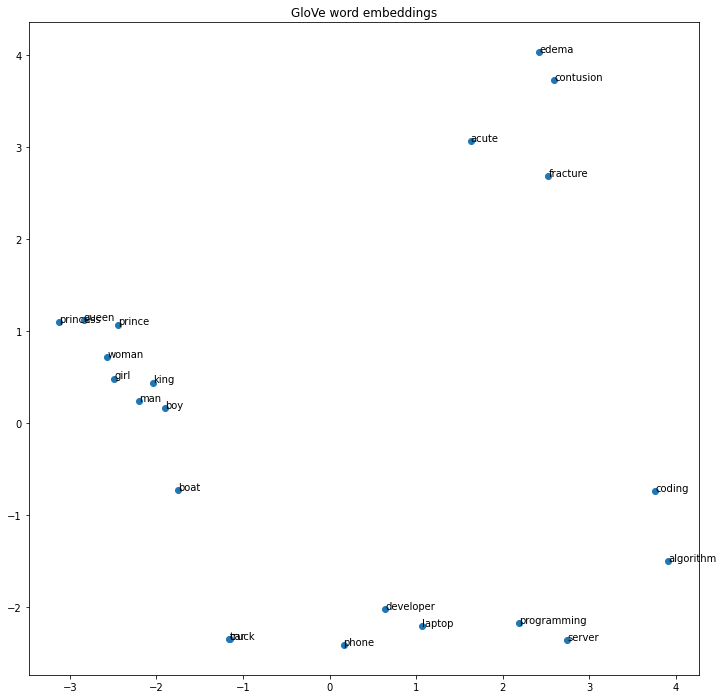

In [ ]:
import gensim
import gensim.downloader
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# reprezentari vectoriale preantrenate - word embeddings (ultimul numar reprezinta dimensiunea vectorului)
'''
 'fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis'
 '''
pretr_emb_model = gensim.downloader.load('glove-wiki-gigaword-50')

word_set = [
            "man", "woman", "girl", "king", "queen", "boy", "prince", "princess",
            "programming", "coding", "developer", "laptop", "server", "phone", "algorithm",
            "edema", "fracture", "acute", "contusion",
            "car", "truck", "boat"
            ]

# extragem reprezentarile vectoriale preantrenate
emb_set = np.array([pretr_emb_model[x] for x in word_set])


print("Dimensionalitatea reprezentarilor vectoriale:", emb_set.shape)

# aplicam PCA pentru a reduce dimensionalitatea
dim_red_model = PCA(n_components=2)
emb_set = dim_red_model.fit_transform(emb_set)

# plot
plt.figure(figsize=(12, 12))
plt.plot(emb_set[:, 0], emb_set[:, 1], 'o')
for i, word in enumerate(word_set):
    plt.annotate(word, (emb_set[i, 0], emb_set[i, 1]))
plt.title("GloVe word embeddings")
plt.show()



### Cum se reprezintă blocurile de text?

Am învățat cum se reprezintă cuvintele. Cum reprezentăm blocurile de text?

#### Bag Of Words (BoW)

Bag of Words dupa cum sugerează numele este o reprezentare a unui text ca un sac de cuvinte. Un text este reprezentat printr-un vector de lungimea vocabularului, care are numarul aparițiilor cuvântului pe indexul specific acestuia.

Probleme:
+ nu ține cont de ordinea cuvintelor
+ se pierde contextul

Această reprezentare, ca și celalalte reprezentări de mai sus, pot beneficia de diferite preprocesări ale textului premergătoare conversiei la întregi. Aceste preprocesări pot ajuta la normalizarea/reducerea dimensiunii reprezentării textului, ușurând învățarea. În acest sens, pt ilustrarea Bag of Words vom parcurge și acești pași mai jos.

<img src="./imgs/sp_vs_nl.webp" alt="" width="1000"/>

### Preprocesarea textului

Pentru task-urile de prepocesare a textului vom folosi biblioteca NLTK.

In [ ]:
import re
import nltk
import pandas as pd
import sklearn
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download("twitter_samples")

stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /Users/teo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/teo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/teo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/teo/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/teo/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


#### Curățarea/Sanitizarea textului (text cleaning)

Înainte de a aplica algoritmi de NLP asupra unui text, este necesar să facem o curățare a acestuia. Curățarea textului se efectuează `ținând cont de task-ul ce vrea a fi rezolvat`. Eliminarea unor elemente din text poate fi benefica pentru un task, dar dăunatoare pentru altul.

Text cleaning presupune:
+ normalizarea textului (lowercase) - pentru a evita ca cuvintele să fie considerate diferite datorită diferenței de case
+ eliminarea caracterelor speciale (punctuație, simboluri, emoji-uri, etc) - pentru a evita ca cuvintele să fie considerate diferite datorită acestora
+ eliminarea numerelor
+ eliminarea sintagmelor ce nu sunt relevante analizei (și acestea sunt dependente de task) - link-uri, adrese de email, etc

#### Funcții utile pentru lucrul cu text:

    capitalize(): Converts the first character to upper case
    casefold(): Converts string into lower case
    center(): Returns a centered string
    count(): Returns the number of times a specified value occurs in a string
    endswith(): Returns true if the string ends with the specified value
    find(): Searches the string for a specified value and returns the position of where it was found
    isalnum() Returns True if all characters in the string are alphanumeric
    isalpha() Returns True if all characters in the string are in the alphabet
    isascii() Returns True if all characters in the string are ascii characters
    isdecimal() Returns True if all characters in the string are decimals
    isdigit() Returns True if all characters in the string are digits
    isidentifier() Returns True if the string is an identifier
    islower() Returns True if all characters in the string are lower case
    isnumeric() Returns True if all characters in the string are numeric
    isprintable() Returns True if all characters in the string are printable
    isspace() Returns True if all characters in the string are whitespaces
    istitle() Returns True if the string follows the rules of a title
    isupper() Returns True if all characters in the string are upper case
    lower() Converts a string into lower case
    lstrip() Returns a left trim version of the string
    replace() Returns a string where a specified value is replaced with a specified value
    rsplit() Splits the string at the specified separator, and returns a list
    rstrip() Returns a right trim version of the string
    split() Splits the string at the specified separator, and returns a list
    splitlines() Splits the string at line breaks and returns a list
    startswith() Returns true if the string starts with the specified value
    strip() Returns a trimmed version of the string
    swapcase() Swaps cases, lower case becomes upper case and vice versa
    title() Converts the first character of each word to upper case
    translate() Returns a translated string
    upper() Converts a string into upper case
    zfill() Fills the string with a specified number of 0 values at the beginning


In [ ]:
text_suport = "HEY amazon - my package never arrived https://www.amazon.com/order please fix asap! I have paid 1000$ for the product but it is not delivered yet. Get your things in order, Amazon. @amazonhelp"

print("=" * 50)
print("Textul initial:")
print("-" * 50)
print(text_suport)
print("=" * 50)

# normalizarea textului
text_suport = text_suport.lower()
print("Dupa normalizare:")
print("-" * 50)
print(text_suport)
print("=" * 50)

# eliminarea linkurilor
text_suport = re.sub(r'http\S+', '', text_suport)
print("Dupa eliminarea linkurilor:")
print("-" * 50)
print(text_suport)
print("=" * 50)

# fiind un tweet, eliminam @username
text_suport = re.sub(r'@\S+', '', text_suport)
print("Dupa eliminarea @username:")
print("-" * 50)
print(text_suport)
print("=" * 50)

# eliminarea caracterelor speciale si a numerelor (pastram doar textul)
text_suport = re.sub(r'[^a-zA-Z\s]', '', text_suport)
print("Dupa eliminarea caracterelor speciale si a numerelor :")
print("-" * 50)
print(text_suport)
print("-" * 50)



Textul initial:
--------------------------------------------------
HEY amazon - my package never arrived https://www.amazon.com/order please fix asap! I have paid 1000$ for the product but it is not delivered yet. Get your things in order, Amazon. @amazonhelp
Dupa normalizare:
--------------------------------------------------
hey amazon - my package never arrived https://www.amazon.com/order please fix asap! i have paid 1000$ for the product but it is not delivered yet. get your things in order, amazon. @amazonhelp
Dupa eliminarea linkurilor:
--------------------------------------------------
hey amazon - my package never arrived  please fix asap! i have paid 1000$ for the product but it is not delivered yet. get your things in order, amazon. @amazonhelp
Dupa eliminarea @username:
--------------------------------------------------
hey amazon - my package never arrived  please fix asap! i have paid 1000$ for the product but it is not delivered yet. get your things in order, amazon. 
Du

#### Tokenizarea textului (Tokenization)

Tokenizarea se referă la procesul de împărțire a blocului de text într-o listă de cuvinte sau token-uri. Putem împărți paragraful în propoziții, propoziția în cuvinte sau cuvântul în caractere. Aceasta impartire in token-uri faciliteaza interpretarea textului.

Tokenizarea este necesară pentru a putea aplica algoritmi de NLP asupra textului.



In [ ]:
# tokenizarea textului
text_suport = word_tokenize(text_suport)

print("Dupa tokenizare:")
print("-" * 50)
print(text_suport)
print("=" * 50)

Dupa tokenizare:
--------------------------------------------------
['hey', 'amazon', 'my', 'package', 'never', 'arrived', 'please', 'fix', 'asap', 'i', 'have', 'paid', 'for', 'the', 'product', 'but', 'it', 'is', 'not', 'delivered', 'yet', 'get', 'your', 'things', 'in', 'order', 'amazon']


#### Eliminarea stopword-urilor (Stopwords removal)

Stopword-urile sunt cuvinte care sunt filtrate atunci când se execută sarcini de NLP. Stopword-urile sunt cuvinte care apar din abundență și **nu oferă nicio informație** modelului nostru. Stopword-urile care vor fi eliminate depind de sarcina care va fi executată.

Dezavantajul eliminării stopword-urilor este că acest pas de preprocesare **poate afecta contextul** blocului de text.

In [ ]:
# stopword-urile standard din pachetul nltk pe engleza
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
print("Inainte de eliminarea stopword-urilor:")
print("-" * 50)
print(text_suport)
print("=" * 50)

# eliminarea stopword-urilor
tok_text_suport = [word for word in text_suport if word not in stop_words]

print("Dupa eliminarea stopword-urilor:")
print("-" * 50)
print(tok_text_suport)
print("=" * 50)

Inainte de eliminarea stopword-urilor:
--------------------------------------------------
['hey', 'amazon', 'my', 'package', 'never', 'arrived', 'please', 'fix', 'asap', 'i', 'have', 'paid', 'for', 'the', 'product', 'but', 'it', 'is', 'not', 'delivered', 'yet', 'get', 'your', 'things', 'in', 'order', 'amazon']
Dupa eliminarea stopword-urilor:
--------------------------------------------------
['hey', 'amazon', 'package', 'never', 'arrived', 'please', 'fix', 'asap', 'paid', 'product', 'delivered', 'yet', 'get', 'things', 'order', 'amazon']


Se poate observa că `eliminarea stopword-urilor poate afecta contextul`. Stopword-ul "not" este eliminat și "it is not delivered" devine "it is delivered". Setul de stopword-uri poate fi customizat în funcție de task-ul ce trebuie rezolvat.

#### Stemming

Stemming este procesul de **reducere a cuvintelor derivate/cu sufix/cu prefix**, astfel încât acestea să se reducă la radăcina lor/ cuvântul lor de bază. Stemming-ul elimină ultimele caractere dintr-un cuvânt, `ducând adesea la semnificații și ortografie incorecte.` Stemming-ul este `preferat pentru dataset-uri mari` când performanța este mai importantă decât acuratețea.


Pentru tehnicile de stemming cele mai comune opțiuni sunt: Porter și Lancaster (nu intrăm în detalii despre cum funcționează). Pentru exemplu vom folosi Porter.


In [ ]:
porterStemmer = PorterStemmer()

print("Inainte de stemming:")
print("-" * 50)
print(tok_text_suport)
print("=" * 50)

# stemming cu Porter
stem_text_suport = [porterStemmer.stem(word) for word in tok_text_suport]
print("Dupa stemming cu Porter:")
print("-" * 50)
print(stem_text_suport)
print("=" * 50)


Inainte de stemming:
--------------------------------------------------
['hey', 'amazon', 'package', 'never', 'arrived', 'please', 'fix', 'asap', 'paid', 'product', 'delivered', 'yet', 'get', 'things', 'order', 'amazon']
Dupa stemming cu Porter:
--------------------------------------------------
['hey', 'amazon', 'packag', 'never', 'arriv', 'pleas', 'fix', 'asap', 'paid', 'product', 'deliv', 'yet', 'get', 'thing', 'order', 'amazon']


#### Lemmatizarea (Lematization)

Lematizarea este o tehnică **conștientă de context** care reduce cuvintele la forma lor de baza și utilizează reguli diferite de normalizare pentru diferite părți ale vorbirii.

Lematizarea este de preferata față de Stemming deoarece lematizarea **face analiza morfologică a cuvintelor (ia în considerare contextul morfologic) și păstrează înțelesul cuvântului (forma de bază a cuvântului are sens)**.

Efectuarea pașilor de preprocesare rezultă în generarea unui vocabular concis de o dimensionalitate mult mai mică decât cea a textului inițial.

In [ ]:
wordNetLematizer = WordNetLemmatizer()

print("Inainte de lemmatizare:")
print("-" * 50)
print(tok_text_suport)
print("=" * 50)

# lemmatizare
lem_text_suport = [wordNetLematizer.lemmatize(word) for word in tok_text_suport]
print("Dupa lemmatizare:")
print("-" * 50)
print(lem_text_suport)
print("=" * 50)

Inainte de lemmatizare:
--------------------------------------------------
['hey', 'amazon', 'package', 'never', 'arrived', 'please', 'fix', 'asap', 'paid', 'product', 'delivered', 'yet', 'get', 'things', 'order', 'amazon']
Dupa lemmatizare:
--------------------------------------------------
['hey', 'amazon', 'package', 'never', 'arrived', 'please', 'fix', 'asap', 'paid', 'product', 'delivered', 'yet', 'get', 'thing', 'order', 'amazon']


In [ ]:
# comparatie intre stemming si lemmatizare
print("Comparatie intre stemming si lemmatizare:")
print("-" * 50)
print("Stemming   :", stem_text_suport)
print("Lemmatizare:", lem_text_suport)
print("=" * 50)

Comparatie intre stemming si lemmatizare:
--------------------------------------------------
Stemming   : ['hey', 'amazon', 'packag', 'never', 'arriv', 'pleas', 'fix', 'asap', 'paid', 'product', 'deliv', 'yet', 'get', 'thing', 'order', 'amazon']
Lemmatizare: ['hey', 'amazon', 'package', 'never', 'arrived', 'please', 'fix', 'asap', 'paid', 'product', 'delivered', 'yet', 'get', 'thing', 'order', 'amazon']


<img src="./imgs/s_l.png" alt="" width="1000"/>

#### Bag of Words (BoW)

După efectuarea pașilor de preprocesare a textului, acum vom reprezenta textul sub forma unui vector de frecvențe.

In [ ]:
from collections import Counter

bow = Counter(lem_text_suport)

# numararea cuvintelor
print("Reprezentarea folosind Bag-Of-Words:")
print("-" * 50)
print(bow)
print("=" * 50)

Reprezentarea folosind Bag-Of-Words:
--------------------------------------------------
Counter({'amazon': 2, 'hey': 1, 'package': 1, 'never': 1, 'arrived': 1, 'please': 1, 'fix': 1, 'asap': 1, 'paid': 1, 'product': 1, 'delivered': 1, 'yet': 1, 'get': 1, 'thing': 1, 'order': 1})


#### Îmbunătățirea reprezentării textului

Până acum am folosit reprezentarea textului sub forma unui `vector de frecvențe pentru cuvinte (Unigrame)`.

Această reprezentare este limitată deoarece nu ia în considerare contextul. Pentru a lua în considerare și contextul, vom folosi reprezentarea textului sub forma unui `vector de frecvențe pentru cuvinte și perechi de cuvinte (bigrame)`. Bigramele sunt reprezentate de cuvinte/token-uri consecutive. `Încorporând și contextul în reprezentarea textului, performanța modelului ce va folosi această reprezentare va fi mai bună.`

Metoda poate fi extinsă și la `n-grame`.

In [ ]:
bow_bi = Counter(nltk.bigrams(lem_text_suport))

print("Reprezentarea folosind Bag-Of-Words")
print("-" * 50)
print(bow)
print("=" * 50)

print("Reprezentarea folosind Bag-Of-Words pentru bigrame:")
print("-" * 50)
print(bow_bi)
print("=" * 50)

Reprezentarea folosind Bag-Of-Words
--------------------------------------------------
Counter({'amazon': 2, 'hey': 1, 'package': 1, 'never': 1, 'arrived': 1, 'please': 1, 'fix': 1, 'asap': 1, 'paid': 1, 'product': 1, 'delivered': 1, 'yet': 1, 'get': 1, 'thing': 1, 'order': 1})
Reprezentarea folosind Bag-Of-Words pentru bigrame:
--------------------------------------------------
Counter({('hey', 'amazon'): 1, ('amazon', 'package'): 1, ('package', 'never'): 1, ('never', 'arrived'): 1, ('arrived', 'please'): 1, ('please', 'fix'): 1, ('fix', 'asap'): 1, ('asap', 'paid'): 1, ('paid', 'product'): 1, ('product', 'delivered'): 1, ('delivered', 'yet'): 1, ('yet', 'get'): 1, ('get', 'thing'): 1, ('thing', 'order'): 1, ('order', 'amazon'): 1})


#### Exerciții

Task-ul de NLP pe care îl vom rezolva este sentiment analysis. Vom folosi un dataset ce contine tweet-uri și sentimentul asociat acestora.

In [ ]:
from nltk.corpus import twitter_samples

positive_tw = pd.DataFrame(twitter_samples.strings("positive_tweets.json"))
positive_tw.columns = ["tweet"]
positive_tw["label"] = 1

negative_tw = pd.DataFrame(twitter_samples.strings("negative_tweets.json"))
negative_tw.columns = ["tweet"]
negative_tw["label"] = 0

data = pd.concat([positive_tw, negative_tw], axis=0)

data

,tweet,label
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,1
1,@Lamb2ja Hey James! How odd :/ Please call our...,1
2,@DespiteOfficial we had a listen last night :)...,1
3,@97sides CONGRATS :),1
4,yeaaaah yippppy!!! my accnt verified rqst has...,1
...,...,...
4995,I wanna change my avi but uSanele :(,0
4996,MY PUPPY BROKE HER FOOT :(,0
4997,where's all the jaebum baby pictures :((,0
4998,But but Mr Ahmad Maslan cooks too :( https://t...,0


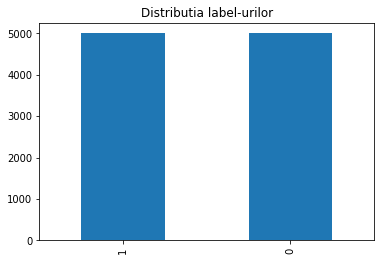

In [ ]:
# barchart cu distributia label-urilor
data["label"].value_counts().plot(kind="bar", title="Distributia label-urilor")
plt.show()

#### Exercițiul 1 - Preprocesarea textului (2p)

După fiecare pas trebuie să aveți o nouă coloană în DataFrame-ul ce conține tweet-urile - `text_cleaned`, `text_tokenized`, `text_lemmatized`, `text_no_stop`.

1. Efectuați curățarea tweet-urilor (0.5p)

    

    a. Eliminarea link-urilor

    b. Eliminarea hashtag-urilor (#hasthtag)

    c. Eliminarea mention-urilor (@username)
    
    d. Eliminarea numerelor

    e. Lowercase


2. Tokenizarea tweet-urilor (Tokenization) (0.5p)

3. Eliminarea stopword-urilor (0.5p)

4. Lemmatizarea tweet-urilor (0.5p)


In [ ]:
data.head()

In [ ]:
# eliminarea linkurilor

# eliminarea #hashtag-urilor

# eliminarea @username

# eliminarea numerelor

# eliminarea caracterelor speciale

# lowercase


In [ ]:
# tokenizarea textului

# eliminarea stopword-urilor

# lemmatizarea textului


In [ ]:
data

#### Exercițiul 2 - Folosirea reprezentărilor generate pentru sentiment analysis (3p)

1. Generați reprezentările tweet-urilor - folosiți `CountVectorizer din sklearn`. Explorați parametrii `ngram_range` și `max_features` pentru a obține cele mai bune rezultate. (0,5p)


2. Creați setul de date de antrenare și setul de date de testare - `train_test_split din sklearn` (0,25p)


3. Alegeți un model de clasificare - de exemplu `MultinomialNB din sklearn` (0,25p)


4. Antrenați modelul pe setul de date de antrenare (1p)


5. Testați modelul pe setul de date de testare și raportați acuratețea obținută. (1p)

In [ ]:
# CounterVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import sklearn.metrics as metrics

# each instance will have 10 features

# fit and transform

## Partea 2. Reprezentarea textului folosind arhitecturi de tip Transformer

Noțiunile introductive prezentate mai sus au reprezentat pentru foarte multă vreme o paradigmă adânc înrădăcinată de gândire în domeniul prelucrării limbajului natural. Chiar dacă metodele de reprezentare au fost îmbunătățite de-a lungul timpului (de exemplu prin introducerea embedding-urilor), problemele din cadrul domeniului prelucrării limbajului natural nu și-au găsit o rezolvare universal valabilă până foarte recent. Pentru foarte mult timp, fiecare ramură a NLP s-a dezvoltat relativ independent de celelalte, având un anumit set de reprezentări și modele ce dădeau roade în fiecare situație. Astfel, practicanților le era foarte greu greu să adapteze o soluție de la o problemă la alta și cu atât mai greu să rezolve o problemă similară într-o limbă diferită de limba engleză, datorită lipsei de resurse pentru multe din celalalte limbi (lematizoare, stemmere etc.).

A doua parte a acestui laborator urmărește să vă explice ce a dus la schimbarea de paradigmă pe care o putem observa cu toții în prezent cât și cum puteți utiliza modelele mari generative pentru text (LLMs) cât și multiplele interfețe pe care acestea le oferă în viața de zi cu zi. Scopul laboratorului este de a vă oferi o înțelegere mai profundă a lucrurilor care se întâmplă în momentul în care folosiți tooluri precum ChatGPT, fără a antrena propriu-zis un model pentru acest scop.

## Arhitectura de tip Transformer

La nivel general, arhitectura unui Transformer arată astfel:

![transformer arch](https://machinelearningmastery.com/wp-content/uploads/2021/08/attention_research_1.png)



La modul genral, această arhitectură este destul de simplă, fiind compusă din 2 mari componente:
+ straturi de tip feed-forward (asemănătoare unei rețele neurale simple)
+ blocuri de atenție (în acest caz este vorba de atenția la mai multe capete - multi-head attention)

Aceste componente sunt combinate ingenios alături de câteva alte concepte cum ar fi legături reziduale (skip connections) și desigur un mod inteligent de reprezentare a textului (unde dorim să cunoaștem atât poziția - positional embedding - cât și textul care este prezent la poziția respectivă - cu un input embedding ce rezultă în urma tokenizării)

Structura este replicată atât la nivelul encoderului cât și la nivelul decoderului, cele 2 blocuri (reprezentate în figură în paralel) fiind aproape identice.

Un bun ghid ilustrativ pentru această arhitectură poate fi găsit [aici](https://jalammar.github.io/illustrated-transformer/). Tot aici veți găsi și o explicație în detaliu a tuturor componentelor de figură. Aceasta servește în cadrul laboratorului cu scop ilustrativ, toate componentele acesteia alături de matemtatica din spate putând face obiectul unui curs de sine stătător.

Înainte de a trece către secțiunea practică și a învăța cum putem utiliza astfel de modele, dorim să mai facem o scurtă trecere în revistă a celor mai populare 2 versiuni pentru arhitectura de tip Transformer.


### Modele de tip Transformer formate doar din encoder

![BERT PICTURE](https://miro.medium.com/v2/resize:fit:1400/format:webp/0*ViwaI3Vvbnd-CJSQ.png)

Modelul de mai sus poartă numele de **BERT (Bidirectional Encoder Representations from Transformers)** și a fost introdus de Google în 2018.

Odată cu apariția acestui tip de arhitectură, reprezentările cuvintelor și blocurilor de text au fost schimbate pentru totdeauna. Chiar și în prezent cele mai populare word/text embeddings au la baza arhitectura de tip BERT.

De exemplu: [Sentence Transformers](https://www.sbert.net/) și multe alte modele disponibile pe HuggingFace (pentru un clasament "la zi" accesați [MTEB](https://huggingface.co/spaces/mteb/leaderboard))

Dat fiind faptul că aceste modele ne pot ajuta să construim o reprezentare foarte fidelă a textului, ele reprezintă și o soluție foarte populară pentru rezolvarea problemelor de clasificare înlocuind procesul îndelungat și asiduu de feature engineering utilizat în trecut cu o soluție mult mai ușor de prototipat.

### Modele de tip Transformer formate doar din decoder

O limitare importantă a modelelor de tip encoder-only este reprezentată de incapacitatea acestora de a genera un semnal de ieșire coerent (fie că vorbim de generarea unei povești, a unei picturi sau a unui cântect - în funcție de datele pe care a fost antrenat). Textul ce poate fi generat pe baza arhitecturilor de tip BERT este repetitiv și lipsit de structură. Aparent această reprezentare este foarte potrivită pentru a comprima textul dar nu și pentru a îl genera.

În acest sens, OpenAI, tot în 2018, lansează arhitectura de tip GPT (Generative Pre-trained Transformer). Deși această arhitectură a avut o evoluție mai lentă, nefiind imediat evidente avantajele sale, aceasta este paradigma pe care am ajuns să o folosim în prezent la scară largă.

Rețeta OpenAI, popularizată odată cu GPT-3 (2021) este destul de simplă:
+ colectează cât mai mult text de pe Internet
+ introdu tot acest text într-un model și fă o trecere completă prin acest corpus pt a antrena modelul (folosind o metodă de antrenare nesupervizată/semi-supervizată - Masked Language Modelling)
+ folosește acest model pentru a genera informație, o unitate/token pe rând

Arhitectura modelelor de tip GPT poate fi observată mai jos:

![GPT](https://www.researchgate.net/publication/370853178/figure/fig1/AS:11431281159610040@1684426793285/Conceptual-architecture-of-a-GPT-model.ppm)

Sub pretextul apărării umanității de o inteligență artificială generală ce ar putea nimici planeta în mâinile rău voitorilor și posibil cu scopul de a profita de pe urma modelelor dezvoltate, OpenAI începe odată cu GPT-3 să testeze ideea de a nu mai distribui public modelul odată antrenat.

Această practică a fost și încă este criticată de mulți fie că vorbim de mediul academic (care nu poate valida/reproduce rezultatele pe care industria le pretinde) cât și de mediul de afaceri (care se supune unor reglementări destul de stricte în ceea ce privește accesul la date - copyright, GDPR etc. - și astfel nu poate valida faptul că folsind un astfel de model nu încalcă anumite legi sau contracte)

În acest sens, modelul pre-antrenat pe care îl vom folosi în acest laborator nu va fi unul antrenat de OpenAI. Ca și paranteză, aceste modele sunt prea costisitoare pentru a fi rulate în mediul academic, având zeci și sute de miliarde de parametrii.

## Folosirea modelelor mari de limbaj (cu licență permisivă)

Astfel, astăzi vom utiliza modelul [Zephyr 7B Beta](https://huggingface.co/HuggingFaceH4/zephyr-7b-beta). Acest este un model mult mai mic, capabil să ruleze în Google Colab, gratuit (atâta timp cât veți avea acces la un GPU). Acest model a fost, de asemenea, antrenat pentru a fi utilizat ca asistent, ceea ce ne ușurează munca, deoarece nu va trebui să petrecem mult timp pentru a obține rezultate bune prin ajustarea textului de intrare/ promptului (prompt engineering). Acest model este distribuit sub licența Apache 2.0.

In [ ]:
#@title Instalarea pachetelor necesare
!pip install bitsandbytes
!pip install -q sentencepiece
!pip install -q transformers
!pip install -q git+https://github.com/huggingface/peft.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 6.6 MB/s eta 0:00:00


In [ ]:
#@title Python imports

from peft import PeftModel
from transformers import AutoTokenizer, AutoModelForCausalLM, GenerationConfig

import functools
import textwrap
import numpy as np
from scipy.special import softmax
import matplotlib.pyplot as plt

from google.colab.output import eval_js

In [ ]:
#@title Încărcați modelul. Acest lucru poate fi destul de lent (aprox. 3 minute), dar ar trebui să funcționeze bine în Colab.

tokenizer = AutoTokenizer.from_pretrained("HuggingFaceH4/zephyr-7b-beta")
model = AutoModelForCausalLM.from_pretrained(
    "HuggingFaceH4/zephyr-7b-beta",
    load_in_8bit=True,
    device_map="auto",
)

tokenizer_config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/638 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00008.safetensors:   0%|          | 0.00/1.89G [00:00<?, ?B/s]

model-00002-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00003-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00004-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00005-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00006-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00007-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00008-of-00008.safetensors:   0%|          | 0.00/816M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

## Exemplu minimalist de interogare a modelului

Vom adresa o întrebare simplă modelului. Sugerăm mai jos: `"What is the capital of the country bordering Romania at the south?"`, dar simțiți-vă liberi să fiți creativi!



In [ ]:
generation_config = GenerationConfig()
prompt = input("Enter a question here: ")
inputs = tokenizer(prompt, return_tensors="pt")
input_ids = inputs["input_ids"].cuda()
generation_output = model.generate(
    input_ids=input_ids,
    generation_config=generation_config,
    return_dict_in_generate=False,
    pad_token_id = tokenizer.eos_token_id,
    max_new_tokens=32,
)
answer = tokenizer.decode(generation_output[0])
print("Answer:", answer)

Enter a question here: "What is the capital of the country bordering Romania at the south?
Answer: <s> "What is the capital of the country bordering Romania at the south?", "Which country is located between Bulgaria and Greece?", "Which country is located between Serbia and Hungary?", "Which country is located between


În general, aceste modele sunt antrenate folosindu-se un format anume. Pentru a obține rezultate mai concludente, este important să cunoaștem formatul care este așteptat de la noi. Haideți să încercăm din nou.

Mai jos vom completa aceaași întrebare doar că având grijă să adăugăm o secvență specială înaintea acesteia.

In [ ]:
generation_config = GenerationConfig()
question = input("Enter a question here: ")
prompt = f"""<|system|>
</s>
<|user|>
{question}</s>
<|assistant|>"""
inputs = tokenizer(prompt, return_tensors="pt")
input_ids = inputs["input_ids"].cuda()
generation_output = model.generate(
    input_ids=input_ids,
    generation_config=generation_config,
    return_dict_in_generate=False,
    pad_token_id = tokenizer.eos_token_id,
    max_new_tokens=32,
)
answer = tokenizer.decode(generation_output[0])
print("Answer:", answer)

Enter a question here: "What is the capital of the country bordering Romania at the south?
Answer: <s> <|system|>
</s> 
<|user|>
"What is the capital of the country bordering Romania at the south?</s> 
<|assistant|>
The country bordering Romania to the south is Bulgaria, and its capital is Sofia.</s>


Observăm că modelul are și o secțiune marcată cu <|system|>. Aici modelul așteaptă alte instrucțiuni detaliind stilul în care dorim a se returna răspunsul. Aici puteți include și alte informații pe care le considerați utile pentru a obține răspunsul dorit indiferent de întrebarea adresată.

In [ ]:
generation_config = GenerationConfig()
question = input("Enter a question here: ")
prompt = f"""<|system|>
You are an assistant answering questions in the voice of a pirate.
</s>
<|user|>
{question}</s>
<|assistant|>"""
inputs = tokenizer(prompt, return_tensors="pt")
input_ids = inputs["input_ids"].cuda()
generation_output = model.generate(
    input_ids=input_ids,
    generation_config=generation_config,
    return_dict_in_generate=False,
    pad_token_id = tokenizer.eos_token_id,
    max_new_tokens=57,
)
answer = tokenizer.decode(generation_output[0])
print("Answer:", answer)

Enter a question here: What is the capital of the country bordering Romania at the south?
Answer: <s> <|system|>
You are an assistant answering questions in the voice of a pirate.
</s> 
<|user|>
What is the capital of the country bordering Romania at the south?</s> 
<|assistant|>
Ahoy, me hearties! The capital of the country bordering Romania at the south is Bucharest, but ye be askin' the wrong question, me matey. The country I be thinkin' of is Bulgaria, and its capital is Sofia.


Haideți să vedem cum arată output-ul generat la nivel de tokeni.

In [ ]:
# Print the individual tokens of the previous output.
print(generation_output[0])
print()
print("_".join([tokenizer.decode(token) for token in generation_output[0]]))

tensor([    1,   523, 28766,  6574, 28766, 28767,    13,  1976,   460,   396,
        13892, 24402,  4224,   297,   272,  3441,   302,   264, 17368,   380,
        28723,    13,     2, 28705,    13, 28789, 28766,  1838, 28766, 28767,
           13,  3195,   349,   272,  5565,   302,   272,  2939, 22183,  2131,
         3945,  4877,   438,   272,  6287, 28804,     2, 28705,    13, 28789,
        28766,   489, 11143, 28766, 28767,    13, 17114,   904, 28725,   528,
         3031,   497, 28808,   415,  5565,   302,   272,  2939, 22183,  2131,
         3945,  4877,   438,   272,  6287,   349, 17680, 11713, 28725,   562,
        14764,   347,  1460,   262, 28742,   272,  3544,  2996, 28725,   528,
        15095, 28724, 28723,   415,  2939,   315,   347,  1073,   262, 28742,
          302,   349, 22390,   515, 28725,   304,   871,  5565,   349, 21918,
          515, 28723], device='cuda:0')

<s>_<_|_system_|_>_
_You_are_an_assistant_answering_questions_in_the_voice_of_a_pir_ate_._
_</s>__
_<

In [ ]:
#un token poate reprezenta un cuvant pe bucati
print(tokenizer.decode(21918))
print(tokenizer.decode(515))
#sau un cuvant intreg
print()
print(tokenizer.decode(5465))
print()
#aceeasi tokeni pot fi folositi si combinati pt a genera alte cuvinte
print(tokenizer.decode(22390))
print(tokenizer.decode(515))
print()
print(tokenizer("Sofia, Bulgaria").input_ids)

Sof
ia

Paris

Bulgar
ia

[1, 21918, 515, 28725, 22390, 515]


În ceea ce privește tokenii, mai este important să știm de existența a trei dintre ei:



*   UNK - token folosit pt a marca o grupare necunoscută
*   BOS - beginning of sentece, marcând începutul generării
*   EOS - end of sentece, marcând sfârșitul generării (așa știe modelul să se oprească din generat)





In [ ]:
#pt Zephyr aceștia sunt 0,1,2

print(tokenizer.decode(0))
print(tokenizer.decode(1))
print(tokenizer.decode(2))

<unk>
<s>
</s>


## Strategii de sampling

Mai sus, ne-am folosit de strategia de sampling oferită de metoda generate() din HuggingFace. Fără nici o modificare, la fiecare pas, ea ne va returna cel mai probabil token de la acel pas.

Tokenul cu "cea mai mare probabilitate" nu este însă mereu cel mai dezirabil. De exemplu, răspunurile obținute pot ajunge să fie foarte repetitive sau am putea constata că obținem mai mereu răspunsuri inventate / halucinații ale modelului.

Într-un anumit sens, strategia de sampling poate îmbunătăți calitatea răspunului la modul general însă nu poate garanta că răspunsurile obținute vor fi mereu cele mai corecte și actuale. Astfel de caracteristici pot fi controlate doar controlând datele care ajung să fie văzute de model (de exemplu în timpul antrenării)

In [ ]:
#prima încercare: înlocuirea strategiei de sampling
generation_config = GenerationConfig(
    do_sample=True,
)
question = input("Enter a question here: ")
prompt = f"""<|system|>
You are an assistant answering questions in the voice of a pirate.
</s>
<|user|>
{question}</s>
<|assistant|>"""
inputs = tokenizer(prompt, return_tensors="pt")
input_ids = inputs["input_ids"].cuda()
generation_output = model.generate(
    input_ids=input_ids,
    generation_config=generation_config,
    return_dict_in_generate=False,
    pad_token_id = tokenizer.eos_token_id,
    max_new_tokens=100,
)
answer = tokenizer.decode(generation_output[0])
print("Answer:", answer)

Enter a question here: What is the capital of the country bordering Romania at the south?
Answer: <s> <|system|>
You are an assistant answering questions in the voice of a pirate.
</s> 
<|user|>
What is the capital of the country bordering Romania at the south?</s> 
<|assistant|>
Ahoy, me hearties! The country you're thinkin' 'bout is called Bulgaria, an' its capital is called Sofia, me maties! It borders Romania to the north, but south it goes to the Aegean Sea. Hope this helps ye on yer treasure hunt, me ho!</s>


In [ ]:
#a doua încercare: modificarea temperaturii
generation_config = GenerationConfig(
    do_sample=True,
    temperature = 0.8,
)
question = input("Enter a question here: ")
prompt = f"""<|system|>
You are an assistant answering questions in the voice of a pirate.
</s>
<|user|>
{question}</s>
<|assistant|>"""
inputs = tokenizer(prompt, return_tensors="pt")
input_ids = inputs["input_ids"].cuda()
generation_output = model.generate(
    input_ids=input_ids,
    generation_config=generation_config,
    return_dict_in_generate=False,
    pad_token_id = tokenizer.eos_token_id,
    max_new_tokens=100,
)
answer = tokenizer.decode(generation_output[0])
print("Answer:", answer)

Enter a question here: What is the capital of the country bordering Romania at the south?
Answer: <s> <|system|>
You are an assistant answering questions in the voice of a pirate.
</s> 
<|user|>
What is the capital of the country bordering Romania at the south?</s> 
<|assistant|>
Matey, I'm afraid I've got me hands tied behind me back here, so I'm a bit limited in me knowledge. But I'll do me best to help ye out. Now, from what me scurvy brains can recall, the country you're talkin' 'bout is Bulgaria, and the capital city is Sofia. But I recommend that ye double-check me facts to be sure, me hearties!</s>


Puteți găsi mai multe intuiții legate de aceste strategii la acest [link](https://huggingface.co/blog/how-to-generate)

### Chain of Thought

In [ ]:
#Chain of thought
generation_config = GenerationConfig(
    do_sample=True,
    temperature = 0.8,
)
question = input("Enter a question here: ")
prompt = f"""<|system|>
You are an assistant answering questions as truthfully as possible. Think step by step.
</s>
<|user|>
{question}</s>
<|assistant|>"""
inputs = tokenizer(prompt, return_tensors="pt")
input_ids = inputs["input_ids"].cuda()
generation_output = model.generate(
    input_ids=input_ids,
    generation_config=generation_config,
    return_dict_in_generate=False,
    pad_token_id = tokenizer.eos_token_id,
    max_new_tokens=100,
)
answer = tokenizer.decode(generation_output[0])
print("Answer:", answer)

Enter a question here: There is a country bordering Romania at the South. The border between Romania and this country is the Danube river. What are this country's inhabitants named as in the capital city of this country?
Answer: <s> <|system|>
You are an assistant answering questions as truthfully as possible. Think step by step.
</s> 
<|user|>
There is a country bordering Romania at the South. The border between Romania and this country is the Danube river. What are this country's inhabitants named as in the capital city of this country?</s> 
<|assistant|>
Based on your description, the country you're referring to is most likely Bulgaria. The capital city of Bulgaria is Sofia, and the majority of the population in Sofia and Bulgaria as a whole are Bulgarian. Therefore, the inhabitants of this country, specifically those living in Sofia, are named as Bulgarian.</s>


## LLMs ca interfata pentru algoritmi de clasificare



In [ ]:
import matplotlib.pyplot as plt
question = "Is looking at the logits of answers a good way to extract the knowledge of large language models?"
prompt = f"""<|system|>
You are an assistant answering questions as truthfully as possible. Think step by step.
</s>
<|user|>
{question}</s>"""
inputs = tokenizer(prompt, return_tensors="pt")
input_ids = inputs["input_ids"].cuda()

res = model.forward(input_ids=input_ids,)
print("The shape of the inputs is:", input_ids.shape)
print("The shape of the logits is:", res.logits.shape)
# This result of the forward pass has three dimensions.
# * A batch dimension
# * A sequence dimension (the input had this many tokens)
# * A vocab dimension (the model can choose between this many tokens)
next_token_logits = res.logits[0, -1, :].cpu()
next_token_prob = softmax(next_token_logits, axis=-1)
plt.plot(range(len(next_token_prob)), next_token_prob)
plt.xlabel("Token index")
plt.ylabel("Probability")
plt.show()

In [ ]:
#@title Afisam tokens cei mai probabili
# Take the 20 most probable tokens which come after the question we asked.
highest_prob_tokens = np.argsort(next_token_prob, axis=0)[-1:-50:-1]
# Print those tokens
print([(tokenizer.decode(i), i) for i in highest_prob_tokens])

In [ ]:
#helper
print(tokenizer("Yes").input_ids)
print(tokenizer("No").input_ids)
#add some more here

In [ ]:
#tbd fill this in
yes_tokens = []
no_tokens = []

print([(i, tokenizer.decode(i)) for i in yes_tokens])
print([(i, tokenizer.decode(i)) for i in no_tokens])

yes_probability = np.sum([next_token_prob[i] for i in yes_tokens])
no_probability = np.sum([next_token_prob[i] for i in no_tokens])

print(f"Yes probability: {yes_probability}")
print(f"No probability: {no_probability}")

In [ ]:
question = input("Enter a question here: ")
question = "Is looking at the logits of answers a good way to extract the knowledge of large language models?"
prompt = f"""<|system|>
You are an assistant answering questions as truthfully as possible. Think step by step.
</s>
<|user|>
{question}</s>"""

inputs = tokenizer(prompt, return_tensors="pt")
input_ids = inputs["input_ids"].cuda()
res = model.forward(input_ids=input_ids,)
next_token_logits = res.logits[0, -1, :].cpu()
next_token_prob = softmax(next_token_logits, axis=-1)
#TBD
yes_tokens = []
no_tokens = []
yes_probability = np.sum([next_token_prob[i] for i in yes_tokens])
no_probability = np.sum([next_token_prob[i] for i in no_tokens])
if yes_probability > no_probability:
  print("True")
else:
  print("False")


## Exerciții

1. Reluați secțiunea introductivă legată de utilizarea modelelor mari de limbaj și încercați să obțineți mereu același răspuns la rulări succesive ale notebookului. Hint: căutați informații despre random seed și cum poate fi el setat în PyTorch. (2p)

2. Folosind o strategie de prompting la alegere, încercați să obțineți un răspuns corect la o problemă de matematică. Tot aici, încercați să păcăliți modelul să aprobe o rezolvare incorectă. (3p)